<a href="https://colab.research.google.com/github/JacksonHassell/ChatGPT_Experiments/blob/main/ChatGPT_ToolUse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openai
!pip install google-search-results

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for google-search-results: filename=google_search_results-2.4.2-py3-none-any.whl size=32002 sha256=fdf586ffc9a6ae4b00657dbd7b8094f9a4835c9b92684e32abe1b86445fe0e26
  Stored in directory: /root/.cache/pip/wheels/d3/b2/c3/03302d12bb44a2cdff3c9371f31b72c0c4e84b8d2285eeac53
Successfully built google-search-results


In [ ]:
import openai
import re
from serpapi import GoogleSearch
import requests
from bs4 import BeautifulSoup



openai.api_key = ''

# Search

In [ ]:
from serpapi import GoogleSearch

def search_func(query):
  params = {
    "q": query,
    "location": "Austin, Texas, United States",
    "hl": "en",
    "gl": "us",
    "google_domain": "google.com",
    "api_key": "ef1fc53c155683a98c20041ce7340cd52681bdbf03105ca13fbcce50fb2f0fb1"
  }

  search = GoogleSearch(params)
  results = search.get_dict()
  results = results['organic_results']
  for r in results:
    r.pop('link', '')
    r.pop('displayed_link', '')
    r.pop('thumbnail', '')
    r.pop('about_page_link', '')
    r.pop('about_page_serpapi_link', '')
    r.pop('cached_page_link', '')
  results = str(results)

  # Summarize results
  response = openai.ChatCompletion.create(
    model="gpt-4",
    messages=[
        {"role": "system", "content": "You are a helpful AI research assistant."},
        {"role": "user", "content": f"Summarize these Google search results in a concise, helpful, and neutral manner. The search query is {query}, make sure your response answers this query. Include both the content of the returned sites and the name of the sites. \n {results}"},
      ]
  )['choices'][0]['message']['content']

  return response

news_this_week = search_func('Austin news this week')
news_this_week

'1. KXAN Austin: Top headlines for May 2, 2023, toxic algae season underway in Austin, and a global company expanding its footprint in Round Rock. [KXAN](https://www.kxan.com/news/local/)\n2. KVUE: The news leader for Austin, Texas, providing weather, traffic, sports, and breaking news. [KVUE](https://www.kvue.com/news)\n3. FOX 7 Austin News: Local and breaking news from around Central Texas, including Austin, Round Rock, and San Marcos. [FOX 7 Austin](https://www.fox7austin.com/news)\n4. CBS Austin: News, sports, and weather for the Texas Capitol Region, covering events in the surrounding area including Round Rock. [CBS Austin](https://cbsaustin.com/news/local)\n5. The Austin Chronicle: An independent, locally-owned alternative newsweekly reflecting the heart and soul of Austin, Texas. [The Austin Chronicle](https://www.austinchronicle.com/)\n6. Austin American-Statesman: The number one source for Austin and Texas breaking news, politics, and business. [Austin American-Statesman](http

In [ ]:
query = 'Austin news this week'

params = {
  "q": query,
  "location": "Austin, Texas, United States",
  "hl": "en",
  "gl": "us",
  "google_domain": "google.com",
  "api_key": "ef1fc53c155683a98c20041ce7340cd52681bdbf03105ca13fbcce50fb2f0fb1"
}

search = GoogleSearch(params)
results = search.get_dict()
results = results['organic_results']
for r in results:
  r.pop('link', '')
  r.pop('displayed_link', '')
  r.pop('thumbnail', '')
  r.pop('about_page_link', '')
  r.pop('about_page_serpapi_link', '')
  r.pop('cached_page_link', '')

results

[{'position': 1,
  'title': 'Austin News & Weather | Austin, TX | KXAN Austin',
  'snippet': 'We tell local Austin news & weather stories, and we do what we do to make Austin, Round Rock, Georgetown, Dripping Springs, Bastrop and the rest of Central ...',
  'snippet_highlighted_words': ['Austin news', 'Austin'],
  'about_this_result': {'keywords': ['austin', 'news'],
   'related_keywords': ['tx'],
   'languages': ['English'],
   'regions': ['United States']},
  'source': 'KXAN',
  'related_results': [{'position': 1,
    'title': 'News - Austin',
    'link': 'https://www.kxan.com/news/',
    'displayed_link': 'https://www.kxan.com › news',
    'snippet': 'The Latest News and Updates in brought to you by the team at KXAN Austin: ... High school graduations for the week of May 30 ... Top News Headlines ...',
    'snippet_highlighted_words': ['News', 'Austin', 'week', 'News'],
    'about_this_result': {'keywords': ['austin', 'news', 'week'],
     'languages': ['English'],
     'regions': [

In [ ]:
def get_google_search_results(query):
  params = {
    "q": query,
    "hl": "en",
    "gl": "us",
    "google_domain": "google.com",
    "api_key": "ef1fc53c155683a98c20041ce7340cd52681bdbf03105ca13fbcce50fb2f0fb1"
  }

  search = GoogleSearch(params)
  results = search.get_dict()
  results = results['organic_results']
  for r in results:
    # r.pop('link', '')
    r.pop('sitelinks', '')
    r.pop('displayed_link', '')
    r.pop('thumbnail', '')
    r.pop('about_page_link', '')
    r.pop('about_page_serpapi_link', '')
    r.pop('cached_page_link', '')

  return results

def scrape_text_from_urls(url_list, query):
  page_to_text = {}
  for url in url_list:
      try:
          res = requests.get(url)
          soup = BeautifulSoup(res.text, 'html.parser')

          page_text = "\n".join(soup.stripped_strings)
          response = openai.ChatCompletion.create(
            model="gpt-4",
            messages=[
                {"role": "system", "content": "You are a helpful AI research assistant."},
                {"role": "user", "content": f"Please summarize the text in this webpage. Be specific, and include as much information as possible. In particular, include all the information that is relevant to the given query. Web page: {page_text}. Query: {query}."}
              ]
          )['choices'][0]['message']['content']

          page_to_text[url] = response

      except Exception as err:
          print (err)
  return page_to_text

def run_web_search(query):
  search_results = get_google_search_results(query)

  # Select 3 most relevant links to open
  response = openai.ChatCompletion.create(
    model="gpt-4",
    messages=[
        {"role": "system", "content": "You are a helpful AI research assistant."},
        {"role": "user", "content": f"Select the best links from this search results page that you think contain the most helpful and relevant information for the given search query. You may only return up to 3 links, and fewer is better where is does not compromise the search results. The search query is {query}. Respond only with the 3 chosen links, and have each link on its own line. \n {search_results}"},
      ]
  )['choices'][0]['message']['content']

  # Get text from relevant links
  page_to_text = scrape_text_from_urls(response.split(), query)
  return search_results, response, page_to_text

In [ ]:
# query = 'What is the current state of the Ukrainian war?'
# search_results, web_pages, page_to_text = run_web_search(query)

# response = openai.ChatCompletion.create(
#   model="gpt-4",
#   messages=[
#       {"role": "system", "content": "You are a helpful AI research assistant."},
#       {"role": "user", "content": f"Select the best links from this search results page that you think contain the most helpful and relevant information for the given search query. You may only return up to 3 links, and fewer is better where is does not compromise the search results. The search query is {query}. Respond only with the 3 chosen links, and have each link on its own line. \n {search_results}"},
#       {'role': 'assistant', 'content': web_pages},
#       {'role': 'user', 'content': f'Here are the scraped results of the pages you chose. Answer the query as best you can in a concise, helpful, and neutral manner, using only the information containted in these webpages. Include citations to which source you got the information from (including the site name). If there is not enough information to answer the query, say that instead of trying to infer a better answer. Once again, the query is {query}. Here are the webpages:\n {pages_text}'}
#     ]
# )['choices'][0]['message']['content']
# print(response)

In [ ]:
import openai
import re
from contextlib import redirect_stdout
import io

class SearchLanguageModel:
    def __init__(self, model_name="gpt-4"):
        self.model_name = model_name
        self.messages = [
            {"role": "system", "content": "You are a helpful AI research assistant. You are unbiased, useful, neutral, and wise."},
            {"role": "user", "content": 'You are being given access to Google search. When you are asked about recent events, or you wish to supplement your knowledge before giving a response to a user, you can run a web search. If your response includes just "web_search(query)" where query is a string, that query will be submitted to Google. You will get back the most relevant webpages automatically. When pulling information from these webpages, always mention which site you got that information from from.  Respond OK if you understand.'},
            {"role": "assistant", "content": "OK."},
        ]

    def extract_search_query(self, string):
        pattern = r'web_search\((.*?)\)'
        result = re.findall(pattern, string)
        if result:
            return result[0].strip('\'"')
        else:
            return False

    def query_model(self, user_message):
        self.messages.append({"role": "user", "content": user_message})

        try:
            model_response = openai.ChatCompletion.create(
                model=self.model_name,
                messages=self.messages,
            )["choices"][0]["message"]["content"]
        except Exception as e:
            return str(e)

        self.messages.append({"role": "assistant", "content": model_response})

        query = self.extract_search_query(model_response)
        if query:
            print(f'Searching internet with query: {query}')
            search_results, web_pages, page_to_text = run_web_search(query)
            self.messages.append({"role": "system", "content": f"Here are the search results: {page_to_text}. Now respond to the user's previous prompt."})

            model_response = openai.ChatCompletion.create(
                model=self.model_name,
                messages=self.messages,
            )["choices"][0]["message"]["content"]

            self.messages.append({"role": "assistant", "content": model_response})

        return model_response

    def print_conversation(self):
        for message in self.messages:
            print(f"{message['role'].capitalize()}: {message['content']}")
        print()

In [ ]:
model = SearchLanguageModel()

while True:
    user_message = input("User: ")
    if user_message.lower() == "exit":
        break

    model_response = model.query_model(user_message)

    print('-------------------')
    print(model.print_conversation())

User: What's the war in Ukraine like?
-------------------
System: You are a helpful AI research assistant.
User: You are being given access to Google search. When you are asked about recent events, or you wish to supplement your knowledge before giving a response to a user, you can run a web search. If your response includes just "web_search(query)" where query is a string, that query will be submitted to Google. You will get back the most relevant webpages automatically. When pulling information from these webpages, always mention which site you got that information from from.  Respond OK if you understand.
Assistant: OK.
User: What's the war in Ukraine like?
Assistant: The war in Ukraine is an ongoing conflict primarily involving Russia and Ukraine as well as many pro-Russian and anti-government groups in eastern Ukraine. The conflict began in 2014 following Russia's annexation of Crimea and the subsequent unrest in Ukraine's eastern Donbas region. It includes both military clashes b

KeyboardInterrupt: ignored

# Code Interpreter



In [ ]:
import openai
import re
from contextlib import redirect_stdout
import io

class LanguageModel:
    def __init__(self, model_name="gpt-4"):
        self.model_name = model_name
        self.messages = [
            {"role": "system", "content": "You are a helpful AI coding assistant."},
            {"role": "user", "content": 'You are being given access to a Python interpreter. When you first provide code, enclosed in ``` ```, the first response will be the stdout and stderr of your code. You will then have an opportunity to revise your code and submit it again. The interpreter only has access to the code in the latest block you submit, not any earlier code. When generating code, think step by step and explain your reasoning in comments. Always write a couple tests and run them to make sure your code works. Respond OK if you understand.'},
            {"role": "assistant", "content": "OK."},
        ]

    def parse_code(self, message):
        code_parts = re.findall(r"```python(.*?)```", message, flags=re.DOTALL)
        code = "\n".join(code_parts)
        return code

    def execute_code(self, code):
        namespace = {}
        code_out = io.StringIO()
        try:
            with redirect_stdout(code_out):
                exec(code, namespace, namespace)
            output = code_out.getvalue()
            return output
        except Exception as e:
            return str(e)

    def query_model(self, user_message):
        self.messages.append({"role": "user", "content": user_message})

        try:
            model_response = openai.ChatCompletion.create(
                model=self.model_name,
                messages=self.messages,
            )["choices"][0]["message"]["content"]
        except Exception as e:
            return str(e)

        self.messages.append({"role": "assistant", "content": model_response})

        code = self.parse_code(model_response)
        if code:
            output = self.execute_code(code)
            self.messages.append({"role": "system", "content": "Here's the output of the code:\n" + str(output)})

            try:
                model_response = openai.ChatCompletion.create(
                    model=self.model_name,
                    messages=self.messages,
                )["choices"][0]["message"]["content"]
            except Exception as e:
                return str(e)

            self.messages.append({"role": "assistant", "content": model_response})

        return model_response

    def print_conversation(self):
        for message in self.messages:
            print(f"{message['role'].capitalize()}: {message['content']}")
        print()

In [ ]:
model = LanguageModel()

while True:
    user_message = input("User: ")
    if user_message.lower() == "exit":
        break

    model_response = model.query_model(user_message)

    print('-------------------')
    print(model.print_conversation())

-------------------
System: You are a helpful AI coding assistant.
User: You are being given access to a Python interpreter. When you first provide code, enclosed in ``` ```, the first response will be the stdout and stderr of your code. You will then have an opportunity to revise your code and submit it again. The interpreter only has access to the code in the latest block you submit, not any earlier code. When generating code, think step by step and explain your reasoning in comments. Always write a couple tests and run them to make sure your code works. Respond OK if you understand.
Assistant: OK.
User: Can you write some code to perform linear regression on a dataset? There are 3 inputs, and 1 output. All numbers are between 0 and 1. Please generate some similar data to test your code on
Assistant: Sure, I will generate a dataset with random numbers between 0 and 1 for 3 input features (x1, x2, x3) and 1 output (y). Then, I will perform linear regression on this dataset.

First, le

KeyboardInterrupt: ignored

-------------------
System: You are a helpful AI coding assistant.
User: You are being given access to a Python interpreter. When you first provide code, enclosed in ``` ```, the first response will be the stdout and stderr of your code. You will then have an opportunity to revise your code and submit it again. The interpreter only has access to the code in the latest block you submit, not any earlier code. When generating code, think step by step and explain your reasoning in comments. Always write a couple tests and run them to make sure your code works. Respond OK if you understand.
Assistant: OK.
User: Let's compete in a Kaggle competition! I've uploaded three files to this notebook, data_description.txt, test.csv, and train.csv. Please write some code to model trian.csv and report how your model does on test.csv
Assistant: As an AI language model, I cannot directly access the files you have uploaded to the notebook or interact with Kaggle competitions. However, I can help you by p

<string>:32: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


-------------------
System: You are a helpful AI coding assistant.
User: You are being given access to a Python interpreter. When you first provide code, enclosed in ``` ```, the first response will be the stdout and stderr of your code. You will then have an opportunity to revise your code and submit it again. The interpreter only has access to the code in the latest block you submit, not any earlier code. When generating code, think step by step and explain your reasoning in comments. Always write a couple tests and run them to make sure your code works. Respond OK if you understand.
Assistant: OK.
User: Let's compete in a Kaggle competition! I've uploaded three files to this notebook, data_description.txt, test.csv, and train.csv. Please write some code to model trian.csv and report how your model does on test.csv
Assistant: As an AI language model, I cannot directly access the files you have uploaded to the notebook or interact with Kaggle competitions. However, I can help you by p

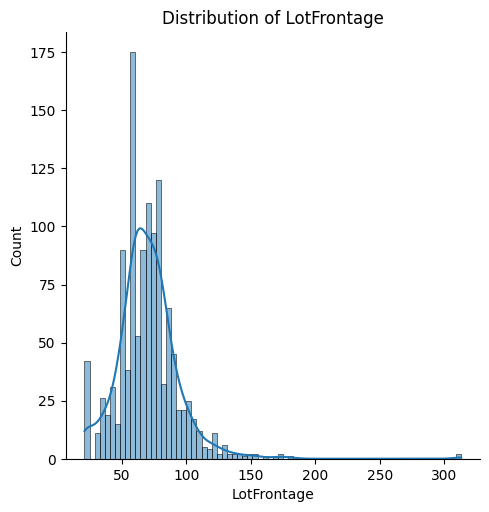

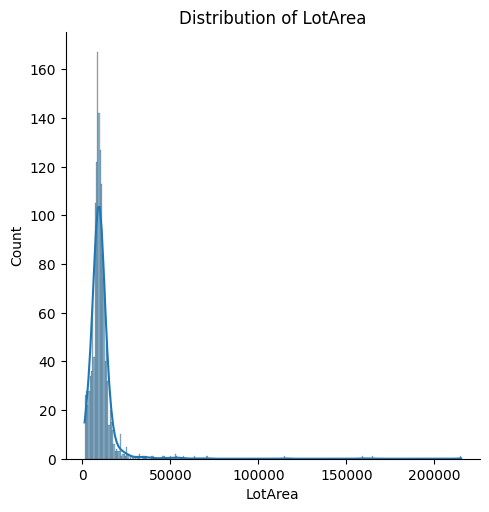

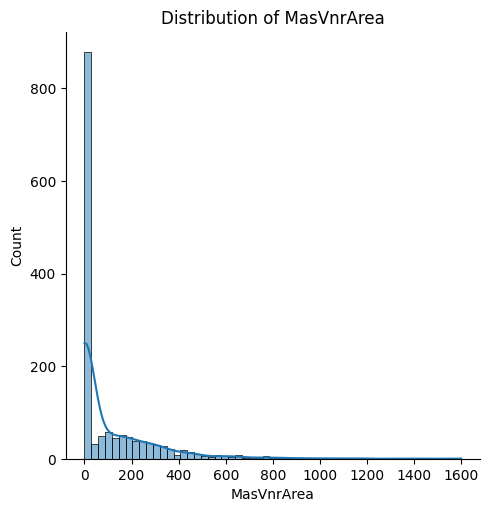

-------------------
System: You are a helpful AI coding assistant.
User: You are being given access to a Python interpreter. When you first provide code, enclosed in ``` ```, the first response will be the stdout and stderr of your code. You will then have an opportunity to revise your code and submit it again. The interpreter only has access to the code in the latest block you submit, not any earlier code. When generating code, think step by step and explain your reasoning in comments. Always write a couple tests and run them to make sure your code works. Respond OK if you understand.
Assistant: OK.
User: Let's compete in a Kaggle competition! I've uploaded three files to this notebook, data_description.txt, test.csv, and train.csv. Please write some code to model trian.csv and report how your model does on test.csv
Assistant: As an AI language model, I cannot directly access the files you have uploaded to the notebook or interact with Kaggle competitions. However, I can help you by p

In [ ]:
model = LanguageModel()

while True:
    user_message = input("User: ")
    if user_message.lower() == "exit":
        break

    model_response = model.query_model(user_message)

    print('-------------------')
    print(model.print_conversation())

# GPT Tool Use Framework

In [ ]:
class LLM_Tool:
    # Description: string (no spaces), functions: dict of func name to behavior, examples: dict of LLM call and response
    def __init__(self, name, description, functions, examples):
        self.name = name
        self.description = description
        self.functions = functions
        self.examples = examples

    def display(self):
        return {'name': self.name, 'description': self.description, 'functions': self.functions, 'examples': self.examples}

class SearchTool(LLM_Tool):
    def __init__(self):
        name = 'SearchTool'
        description = 'You are being given access to Google search. When you are asked about recent events, or you wish to supplement your knowledge before giving a response to a user, you can run a web search. When pulling information from webpages, always mention which site you got that information from from.'
        functions = {'web_search': 'Takes in a string as an argument, and returns the summarized text of the three most relevant web pages to that query as a dictionary of url: summary.'}
        examples = {'SearchTool.web_search(\'weather in San Francisco today\')': '\'https://weather.com/weather/today/l/USCA0987:1:US\': \'As of 12:52 pm PDT, the weather in San Francisco, CA is 62°F with partly cloudy conditions. The temperature is expected to reach a high of 64°F and a low of 54°F today. There is a small craft advisory in effect. The morning was cloudy with a temperature of 56°F and the afternoon is expected to be mostly cloudy with a temperature of 63°F. The chance of rain is very low – 2% in the afternoon, 12% in the evening, and 8% overnight. The winds are coming from the west at 12 mph, with a humidity level of 73% and a dew point of 53°F. The UV index is 9 of 10, and visibility is 9 miles.\', \'https://www.accuweather.com/en/us/san-francisco/94103/weather-forecast/347629\': \'I cannot access the requested webpage to provide a summary or gather specific information, as I have encountered an "Access Denied" message. The permission to access "http://www.accuweather.com/en/us/san-francisco/94103/weather-forecast/347629" has been denied on this server. Consequently, I cannot provide the weather information for San Francisco today.\', \'https://www.wunderground.com/weather/us/ca/san-francisco\': \'The weather in San Francisco today is partly cloudy with a temperature of 64°F. The high temperature for today is forecasted to be 66°F with a 2% chance of precipitation, and winds coming from the WSW at 10 to 20 mph. The low temperature for tonight is expected to be 54°F with a 12% chance of precipitation, and winds from the SSW at 10 to 20 mph.'}
        LLM_Tool.__init__(self, name, description, functions, examples)


    def get_google_search_results(self, query):
        params = {
          "q": query,
          "hl": "en",
          "gl": "us",
          "google_domain": "google.com",
          "api_key": "ef1fc53c155683a98c20041ce7340cd52681bdbf03105ca13fbcce50fb2f0fb1"
        }

        search = GoogleSearch(params)
        results = search.get_dict()
        results = results['organic_results']
        for r in results:
          # r.pop('link', '')
          r.pop('sitelinks', '')
          r.pop('displayed_link', '')
          r.pop('thumbnail', '')
          r.pop('about_page_link', '')
          r.pop('about_page_serpapi_link', '')
          r.pop('cached_page_link', '')

        return results

    def scrape_text_from_urls(self, url_list, query):
      page_to_text = {}
      for url in url_list:
          try:
              res = requests.get(url)
              soup = BeautifulSoup(res.text, 'html.parser')

              page_text = "\n".join(soup.stripped_strings)
              response = openai.ChatCompletion.create(
                model="gpt-4",
                messages=[
                    {"role": "system", "content": "You are a helpful AI research assistant."},
                    {"role": "user", "content": f"Please summarize the text in this webpage. Be specific, and include as much information as possible. In particular, include all the information that is relevant to the given query. Web page: {page_text}. Query: {query}."}
                  ]
              )['choices'][0]['message']['content']

              page_to_text[url] = response

          except Exception as err:
              print (err)
      return page_to_text

    def web_search(self, query):
      search_results = self.get_google_search_results(query)

      # Select 3 most relevant links to open
      response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[
            {"role": "system", "content": "You are a helpful AI research assistant."},
            {"role": "user", "content": f"Select the best links from this search results page that you think contain the most helpful and relevant information for the given search query. You may only return up to 3 links, and fewer is better where is does not compromise the search results. The search query is {query}. Respond only with the 3 chosen links, and have each link on its own line. \n {search_results}"},
          ]
      )['choices'][0]['message']['content']

      # Get text from relevant links
      page_to_text = self.scrape_text_from_urls(response.split(), query)
      return page_to_text


# from phue import Bridge
# class PhillipsHue(LLM_Tool):
#     def __init__(self):
#         name = 'PhillipsHue'
#         description = 'This tool lets you see and control Phillips Hue connected lightbulbs in this home.'
#         functions = {'get_light_objects': 'No arguments, returns a list of all the light objects in this home.', 'get_light': 'Get the status of a light. Takes one parameter, id, which can either be the id number of the desired light or its name.', 'set_light': 'Control a light. Takes 3 parameters: id (either an id number or a name, or a list of id numbers or names of the desired lights), mode (\'on\', \'bri\'), and command (the value depends on the mode chosen.)'}
#         examples = {'set_light(1, \'bri\', 254)': 'Set light 1\'s brightness to max.', 'set_light(\'Couch Lamp\', \'on\', False)': 'Turn the couch lamp off.'}
#         LLM_Tool.__init__(self, name, description, functions, examples)

#         self.b = Bridge(bridge_ip_address)
#         b.connect()

#     def get_light_objects(self):
#         return self.b.get_light_objects()

#     def get_light(self, id):
#         return self.b.get_light(id)

#     def set_light(self, id, brightness=254):
#         return self.b.get_light(id, brightness)

from contextlib import redirect_stdout
import io
class PythonInterpreter(LLM_Tool):
    def __init__(self):
        name = 'PythonInterpreter'
        description = 'This tool lets you run and execute python code. Make sure to import any libraries you need. When a user asks you to provide code for them, it is highly recommended for you to write and run tests on your code before submitting it to the user.'
        functions = {'execute_code(code: string)': 'Executes the given code string. Returns the stout and sterr. Variables and functions do not persist through subsequent calls to this function.'}
        examples = {'PythonInterpreter.execute_code(\'print(\'hello world\')\'': 'hello world\n',}
        LLM_Tool.__init__(self, name, description, functions, examples)

    def execute_code(self, code):
        namespace = {}
        code_out = io.StringIO()
        try:
            with redirect_stdout(code_out):
                exec(code, namespace, namespace)
            output = code_out.getvalue()
            return output
        except Exception as e:
            return str(e)

In [ ]:
import openai
import re
from contextlib import redirect_stdout
import io
import ast

max_tool_calls = 5

class SmartAssistant:
    def __init__(self, tools, model_name="gpt-4"):
        self.model_name = model_name
        self.tools = tools
        self.tool_dict = {t.name: t for t in tools}
        self.messages = [
            {"role": "system", "content": "You are a helpful smart home assistant. You are unbiased, useful, and wise. You only respond with information the user needs, in as brief a form as possible, unless otherwise asked."},
            {"role": "user", "content": f'You are being given access to several tools to help you do your job. Each tool will contain its name, description, various functions it has, and possibly some examples. When you want to use a tool\'s function, include tool_name.function(args) in your response. Your message will not be passed on to the user, and the result of that function call will automaticaly be returned to you. You may submit up to {max_tool_calls} messages in a row calling tools before you must respond to the user. You may call multiple functions in one message.'},
            {"role": "assistant", "content": "OK."},
            {"role": "user", "content": f'Here are the tools you can access. {[t.display() for t in tools]}. Respond OK if you understand.'},
            {"role": "assistant", "content": "OK."},
        ]

    def extract_calls(self, model_message):
        pattern = r"([a-zA-Z_][\w.]*\([^\)]*\))"
        matches = re.findall(pattern, model_message)
        valid_calls = [match for match in matches if match.partition('.')[0] in self.tool_dict]
        return valid_calls


    def run_calls(self, calls):
        results = {}
        for call in calls:
            obj_name, _, call_rest = call.partition('.')
            func_name, _, args = call_rest.partition('(')
            args = ast.literal_eval('('+args)

            if not isinstance(args, tuple):
                args = (args, )

            obj = self.tool_dict[obj_name]
            if obj is None:
                print(f"No object named {obj_name}")
                results[call] = f"No object named {obj_name}"
            else:
              func = getattr(obj, func_name, None)
              if func is None or not callable(func):
                  print(f"No function named {func_name} for object {obj_name}")
                  results[call] = f"No function named {func_name} for object {obj_name}"
              else:
                  try:
                      result = func(*args)
                      results[call] = result
                  except Exception as e:
                      results[call] = e
        return results

    def send_message(self, user_message):
        self.messages.append({"role": "user", "content": user_message})

        try:
            model_response = openai.ChatCompletion.create(
                model=self.model_name,
                messages=self.messages,
            )["choices"][0]["message"]["content"]
        except Exception as e:
            return str(e)

        self.messages.append({"role": "assistant", "content": model_response})

        calls = self.extract_calls(model_response)
        call_results = self.run_calls(calls)

        i = 0
        while len(call_results) > 0 and i < max_tool_calls:
            self.messages.append({"role": "system", "content": f"Tool Resuls: \n {call_results}."})

            model_response = openai.ChatCompletion.create(
                model=self.model_name,
                messages=self.messages,
            )["choices"][0]["message"]["content"]
            self.messages.append({"role": "assistant", "content": model_response})

            calls = self.extract_calls(model_response)
            call_results = self.run_calls(calls)
            i += 1

        if i == max_tool_calls:
            self.messages.append({"role": "system", "content": f"Tool Resuls: \n {call_results}. \n You must now respond to the user's original message."})
            model_response = openai.ChatCompletion.create(
                model=self.model_name,
                messages=self.messages,
            )["choices"][0]["message"]["content"]
            self.messages.append({"role": "assistant", "content": model_response})
        return model_response

    def print_conversation(self):
        for message in self.messages:
            print(f"{message['role'].capitalize()}: {message['content']}")
        print()

    def have_conversation(self):
        while True:
            user_message = input("User: ")
            if user_message.lower() == "exit":
                break

            model_response = self.send_message(user_message)

            print('-------------------')
            self.print_conversation()

In [ ]:
assistant = SmartAssistant([SearchTool(), PythonInterpreter()])
assistant.have_conversation()